In [1]:
import pandas as pd

dataset = pd.read_csv("datasets/apartments.csv", encoding="cp1252", sep=';', on_bad_lines="skip")

FileNotFoundError: [Errno 2] No such file or directory: 'datasets/apartments.csv'

In [22]:
dataset.columns

Index(['id', 'category', 'title', 'body', 'amenities', 'bathrooms', 'bedrooms',
       'currency', 'fee', 'has_photo', 'pets_allowed', 'price',
       'price_display', 'price_type', 'square_feet', 'address', 'cityname',
       'state', 'latitude', 'longitude', 'source', 'time'],
      dtype='object')

latitude, longitude, square feet 

In [28]:
chosen_cols = dataset[dataset['price_type'] == 'Monthly'][['latitude', 'longitude', 'square_feet', 'price']].dropna()
subset_with_price = chosen_cols.to_numpy()
subset = chosen_cols[['latitude', 'longitude', 'square_feet']].to_numpy()

In [37]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler((-1,1))
subset2 = scaler.fit_transform(subset)
subset2 = subset2 - subset2.mean()

subset2.shape

(9988, 3)

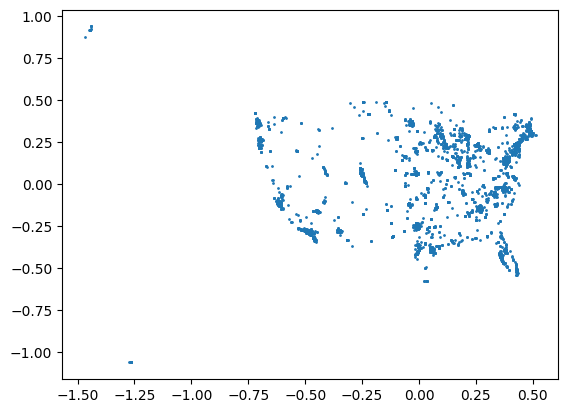

In [38]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 

pca = PCA(n_components=2)
d2 = pca.fit_transform(subset2)

plt.scatter(d2[:,0], d2[:,1], s=1)


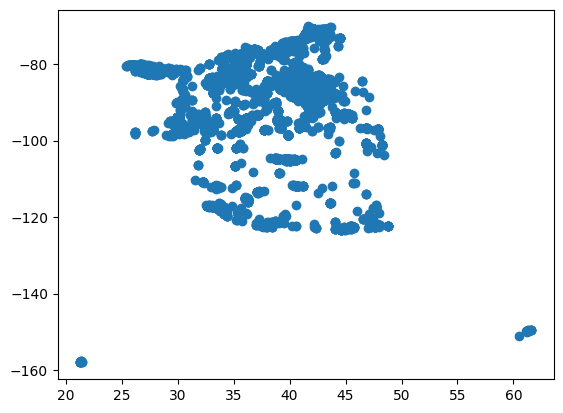

In [30]:
plt.scatter(subset[:,0], subset[:,1])

In [2]:
import pandas as pd
import numpy as np
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
covertype = fetch_ucirepo(id=31) 


In [3]:
# data (as pandas dataframes) 
X = covertype.data.features 
y = covertype.data.targets 
  
# metadata 
print(covertype.metadata) 
  
# variable information 
print(covertype.variables) 

{'uci_id': 31, 'name': 'Covertype', 'repository_url': 'https://archive.ics.uci.edu/dataset/31/covertype', 'data_url': 'https://archive.ics.uci.edu/static/public/31/data.csv', 'abstract': 'Classification of pixels into 7 forest cover types based on attributes such as elevation, aspect, slope, hillshade, soil-type, and more.', 'area': 'Biology', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 581012, 'num_features': 54, 'feature_types': ['Categorical', 'Integer'], 'demographics': [], 'target_col': ['Cover_Type'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1998, 'last_updated': 'Sat Mar 16 2024', 'dataset_doi': '10.24432/C50K5N', 'creators': ['Jock Blackard'], 'intro_paper': None, 'additional_info': {'summary': 'Predicting forest cover type from cartographic variables only (no remotely sensed data).  The actual forest cover type for a given observation (30 x 30 meter cell) was determined from

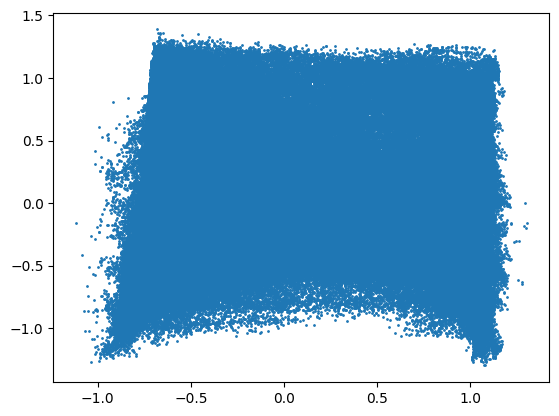

In [5]:
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt 
from sklearn.preprocessing import MinMaxScaler

chosen_cols = X[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm']]

m = chosen_cols.to_numpy()
m = m - m.mean()

scaler = MinMaxScaler((-1,1))
m = scaler.fit_transform(m)

pca = PCA(n_components = 2)
m2d = pca.fit_transform(m)

plt.scatter(m2d[:,0], m2d[:,1], s=1)


In [6]:
np.save("datasets/forest-large.npy", m)

In [7]:
m.shape

(581012, 9)